In [72]:
# %load poi_id.py
#!/usr/bin/python

import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pprint
pp = pprint.PrettyPrinter(indent=4)
sys.path.append("D:/Desktop/WGU Projects/data_analyst_nanodegree/machine_learning/ud120-projects-master/tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data


### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("D:/Desktop/WGU Projects/data_analyst_nanodegree/machine_learning/ud120-projects-master/final_project/final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

In [108]:
#Wanted to explore using pandas
import pandas as pd

enron_df = pd.DataFrame(data_dict)
enron_df = enron_df.T
enron_df

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,82782,239671,NaN,NaN,827696,63014
BAZELIDES PHILIP J,NaN,684694,NaN,NaN,NaN,1599641,NaN,NaN,NaN,NaN,...,93750,874,False,NaN,NaN,80818,NaN,NaN,860136,1599641
BECK SALLY W,700000,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172,4343,144,386,...,NaN,566,False,126027,NaN,231330,2639,7315,969068,126027
BELDEN TIMOTHY N,5249999,2144013,2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,...,NaN,210698,True,157569,NaN,213999,5521,7991,5501630,1110705
BELFER ROBERT,NaN,NaN,102500,102500,NaN,3285,3285,NaN,NaN,NaN,...,NaN,NaN,False,44093,44093,NaN,NaN,NaN,102500,NaN
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396,11892,NaN,NaN,NaN,...,NaN,NaN,False,869220,NaN,216582,NaN,NaN,228474,2493616


I Quickly notice Negative numbers and a lot of NaN's

In [74]:
enron_df.shape

(146, 21)

In [75]:
def neg_nan_count(data_dict):
    '''returns a dictionary containing the number of NaNs for each feature and the number of negative numbers for each feature'''
    keys_w_nans = dict((key, 0) for key, value in data_dict['METTS MARK'].iteritems())
    keys_w_negs = dict((key, 0) for key, value in data_dict['METTS MARK'].iteritems())
    for person in data_dict:
        for key, value in data_dict[person].iteritems():
            if value == "NaN":
                keys_w_nans[key] += 1
            elif value < 0:
                keys_w_negs[key] += 1
    return keys_w_nans, keys_w_negs

In [76]:
keys_w_nans, keys_w_negs = neg_nan_count(data_dict)

print "Number of NaNs:"          
pp.pprint(keys_w_nans)
print
print "Number of Negative Values"
pp.pprint(keys_w_negs)

Number of NaNs:
{   'bonus': 64,
    'deferral_payments': 107,
    'deferred_income': 97,
    'director_fees': 129,
    'email_address': 35,
    'exercised_stock_options': 44,
    'expenses': 51,
    'from_messages': 60,
    'from_poi_to_this_person': 60,
    'from_this_person_to_poi': 60,
    'loan_advances': 142,
    'long_term_incentive': 80,
    'other': 53,
    'poi': 0,
    'restricted_stock': 36,
    'restricted_stock_deferred': 128,
    'salary': 51,
    'shared_receipt_with_poi': 60,
    'to_messages': 60,
    'total_payments': 21,
    'total_stock_value': 20}

Number of Negative Values
{   'bonus': 0,
    'deferral_payments': 1,
    'deferred_income': 49,
    'director_fees': 0,
    'email_address': 0,
    'exercised_stock_options': 0,
    'expenses': 0,
    'from_messages': 0,
    'from_poi_to_this_person': 0,
    'from_this_person_to_poi': 0,
    'loan_advances': 0,
    'long_term_incentive': 0,
    'other': 0,
    'poi': 0,
    'restricted_stock': 1,
    'restricted_stock_

In [77]:
for person in data_dict:
    if data_dict[person]['deferral_payments'] < 0:
        print data_dict[person]['deferral_payments']
        print person

-102500
BELFER ROBERT


This must be a mis-entry into the dataset. According to the pdf with financial values, this should be his 'deferred income' value, which makes sense. Deferral payments should be positive not negative. Taking a look at all of his values (below) shows some other errors.

In [78]:
pp.pprint (data_dict['BELFER ROBERT'])

{   'bonus': 'NaN',
    'deferral_payments': -102500,
    'deferred_income': 'NaN',
    'director_fees': 3285,
    'email_address': 'NaN',
    'exercised_stock_options': 3285,
    'expenses': 'NaN',
    'from_messages': 'NaN',
    'from_poi_to_this_person': 'NaN',
    'from_this_person_to_poi': 'NaN',
    'loan_advances': 'NaN',
    'long_term_incentive': 'NaN',
    'other': 'NaN',
    'poi': False,
    'restricted_stock': 'NaN',
    'restricted_stock_deferred': 44093,
    'salary': 'NaN',
    'shared_receipt_with_poi': 'NaN',
    'to_messages': 'NaN',
    'total_payments': 102500,
    'total_stock_value': -44093}


In [79]:
data_dict['BELFER ROBERT']['director_fees'] = 102500
data_dict['BELFER ROBERT']['deferred_income'] = -102500
data_dict['BELFER ROBERT']['deferral_payments'] = 'NaN'
data_dict['BELFER ROBERT']['expenses'] = 3285 
data_dict['BELFER ROBERT']['total_payments'] = 102500
data_dict['BELFER ROBERT']['restricted_stock'] = 44093
data_dict['BELFER ROBERT']['restricted_stock_deferred'] = -44093
data_dict['BELFER ROBERT']['total_stock_value'] = "NaN"

In [80]:
for person in data_dict:
    if data_dict[person]['restricted_stock'] < 0:
        print data_dict[person]['restricted_stock']
        print person

-2604490
BHATNAGAR SANJAY


This too is a mis-entry according to the pdf. This negative value is meant to be his 'restricted_stock_deferred' and he is meant to have a positive value here.

In [81]:
pp.pprint (data_dict['BHATNAGAR SANJAY'])

{   'bonus': 'NaN',
    'deferral_payments': 'NaN',
    'deferred_income': 'NaN',
    'director_fees': 137864,
    'email_address': 'sanjay.bhatnagar@enron.com',
    'exercised_stock_options': 2604490,
    'expenses': 'NaN',
    'from_messages': 29,
    'from_poi_to_this_person': 0,
    'from_this_person_to_poi': 1,
    'loan_advances': 'NaN',
    'long_term_incentive': 'NaN',
    'other': 137864,
    'poi': False,
    'restricted_stock': -2604490,
    'restricted_stock_deferred': 15456290,
    'salary': 'NaN',
    'shared_receipt_with_poi': 463,
    'to_messages': 523,
    'total_payments': 15456290,
    'total_stock_value': 'NaN'}



There are a few corrections to be made here. This occured because there is a blank space instead of dash for 'other' meaning that all of the values got slid one to the left.

In [82]:
data_dict['BHATNAGAR SANJAY']['exercised_stock_options'] = 15456290
data_dict['BHATNAGAR SANJAY']['restricted_stock'] = 2604490
data_dict['BHATNAGAR SANJAY']['restricted_stock_deferred'] = -2604490
data_dict['BHATNAGAR SANJAY']['total_stock_value'] = 15456290
data_dict['BHATNAGAR SANJAY']['total_payments'] = 137864
data_dict['BHATNAGAR SANJAY']['other'] = 'NaN'

In [83]:

keys_w_nans, keys_w_negs = neg_nan_count(data_dict)

print "Number of Negative Values"
pp.pprint(keys_w_negs)

Number of Negative Values
{   'bonus': 0,
    'deferral_payments': 0,
    'deferred_income': 50,
    'director_fees': 0,
    'email_address': 0,
    'exercised_stock_options': 0,
    'expenses': 0,
    'from_messages': 0,
    'from_poi_to_this_person': 0,
    'from_this_person_to_poi': 0,
    'loan_advances': 0,
    'long_term_incentive': 0,
    'other': 0,
    'poi': 0,
    'restricted_stock': 0,
    'restricted_stock_deferred': 18,
    'salary': 0,
    'shared_receipt_with_poi': 0,
    'to_messages': 0,
    'total_payments': 0,
    'total_stock_value': 0}



This looks a lot cleaner now. Let's make sure there are no negative values in either of the categories where everything should be postiive.

In [84]:
for person in data_dict:
    if data_dict[person]['deferred_income'] > 0 and data_dict[person]['deferred_income'] != "NaN":
        print person, data_dict[person]['deferred_income']

In [85]:
for person in data_dict:
    if data_dict[person]['restricted_stock_deferred'] > 0 and data_dict[person]['restricted_stock_deferred'] != "NaN":
        print person, data_dict[person]['restricted_stock_deferred']

Let's turn those negative values into positive values now, since some classifiers (e.g. SelectKbest with chi-squared) can have issues with negative values.

In [86]:
for person in data_dict:
    if data_dict[person]['deferred_income'] < 0 and data_dict[person]['deferred_income'] != "NaN":
        data_dict[person]['deferred_income'] = - data_dict[person]['deferred_income']
        
for person in data_dict:
    if data_dict[person]['restricted_stock_deferred'] < 0 and data_dict[person]['restricted_stock_deferred'] != "NaN":
        data_dict[person]['restricted_stock_deferred'] = - data_dict[person]['restricted_stock_deferred']

In [87]:
keys_w_nans, keys_w_negs = neg_nan_count(data_dict)

print "Number of Negative Values"
pp.pprint(keys_w_negs)

Number of Negative Values
{   'bonus': 0,
    'deferral_payments': 0,
    'deferred_income': 0,
    'director_fees': 0,
    'email_address': 0,
    'exercised_stock_options': 0,
    'expenses': 0,
    'from_messages': 0,
    'from_poi_to_this_person': 0,
    'from_this_person_to_poi': 0,
    'loan_advances': 0,
    'long_term_incentive': 0,
    'other': 0,
    'poi': 0,
    'restricted_stock': 0,
    'restricted_stock_deferred': 0,
    'salary': 0,
    'shared_receipt_with_poi': 0,
    'to_messages': 0,
    'total_payments': 0,
    'total_stock_value': 0}


Text(0,0.5,'bonus')

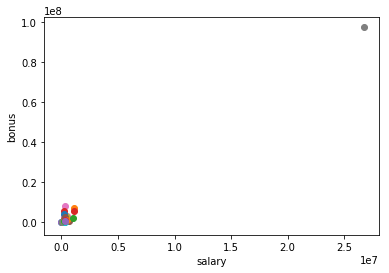

In [88]:
#Plotting Bonus vs Salary, Checking for the outliers

features = ["salary", "bonus"]

data = featureFormat(data_dict, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")


In [89]:
### Removed 'Total'
features = ["salary", "bonus"]
data_dict.pop('TOTAL', 0)
data = featureFormat(data_dict, features)


In [90]:
#Check and take care of "NaN"
# Convert to numpy nan
enron_df.replace(to_replace='NaN', value=np.nan, inplace=True)

enron_df

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,NaN,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,...,304805.0,152.0,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
BADUM JAMES P,NaN,178980.0,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466.0,257817.0
BANNANTINE JAMES M,NaN,NaN,-5104.0,NaN,james.bannantine@enron.com,4046157.0,56301.0,29.0,39.0,0.0,...,NaN,864523.0,False,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,NaN,NaN,6680544.0,11200.0,NaN,NaN,NaN,...,1586055.0,2660303.0,False,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0
BAY FRANKLIN R,400000.0,260455.0,-201641.0,NaN,frank.bay@enron.com,NaN,129142.0,NaN,NaN,NaN,...,NaN,69.0,False,145796.0,-82782.0,239671.0,NaN,NaN,827696.0,63014.0
BAZELIDES PHILIP J,NaN,684694.0,NaN,NaN,NaN,1599641.0,NaN,NaN,NaN,NaN,...,93750.0,874.0,False,NaN,NaN,80818.0,NaN,NaN,860136.0,1599641.0
BECK SALLY W,700000.0,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172.0,4343.0,144.0,386.0,...,NaN,566.0,False,126027.0,NaN,231330.0,2639.0,7315.0,969068.0,126027.0
BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,108.0,...,NaN,210698.0,True,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0
BELFER ROBERT,NaN,-102500.0,NaN,3285.0,NaN,3285.0,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,44093.0,NaN,NaN,NaN,102500.0,-44093.0
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396.0,11892.0,NaN,NaN,NaN,...,NaN,NaN,False,869220.0,NaN,216582.0,NaN,NaN,228474.0,2493616.0


In [91]:
#Dataframe now shows the new features

enron_df.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,8.200000e+01,3.900000e+01,4.900000e+01,1.700000e+01,1.020000e+02,9.500000e+01,86.000000,86.000000,86.000000,4.000000e+00,6.600000e+01,9.300000e+01,1.100000e+02,1.800000e+01,9.500000e+01,86.000000,86.000000,1.250000e+02,1.260000e+02
mean,2.374235e+06,1.642674e+06,-1.140475e+06,1.668049e+05,5.987054e+06,1.087289e+05,608.790698,64.895349,41.232558,4.196250e+07,1.470361e+06,9.190650e+05,2.321741e+06,1.664106e+05,5.621943e+05,1176.465116,2073.860465,5.081526e+06,6.773957e+06
std,1.071333e+07,5.161930e+06,4.025406e+06,3.198914e+05,3.106201e+07,5.335348e+05,1841.033949,86.979244,100.073111,4.708321e+07,5.942759e+06,4.589253e+06,1.251828e+07,4.201494e+06,2.716369e+06,1178.317641,2582.700981,2.906172e+07,3.895777e+07
min,7.000000e+04,-1.025000e+05,-2.799289e+07,3.285000e+03,3.285000e+03,1.480000e+02,12.000000,0.000000,0.000000,4.000000e+05,6.922300e+04,2.000000e+00,-2.604490e+06,-7.576788e+06,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.312500e+05,8.157300e+04,-6.948620e+05,9.878400e+04,5.278862e+05,2.261400e+04,22.750000,10.000000,1.000000,1.600000e+06,2.812500e+05,1.215000e+03,2.540180e+05,-3.896218e+05,2.118160e+05,249.750000,541.250000,3.944750e+05,4.945102e+05
50%,7.693750e+05,2.274490e+05,-1.597920e+05,1.085790e+05,1.310814e+06,4.695000e+04,41.000000,35.000000,8.000000,4.176250e+07,4.420350e+05,5.238200e+04,4.517400e+05,-1.469750e+05,2.599960e+05,740.500000,1211.000000,1.101393e+06,1.102872e+06
75%,1.200000e+06,1.002672e+06,-3.834600e+04,1.137840e+05,2.547724e+06,7.995250e+04,145.500000,72.250000,24.750000,8.212500e+07,9.386720e+05,3.620960e+05,1.002370e+06,-7.500975e+04,3.121170e+05,1888.250000,2634.750000,2.093263e+06,2.949847e+06
max,9.734362e+07,3.208340e+07,-8.330000e+02,1.398517e+06,3.117640e+08,5.235198e+06,14368.000000,528.000000,609.000000,8.392500e+07,4.852193e+07,4.266759e+07,1.303223e+08,1.545629e+07,2.670423e+07,5521.000000,15149.000000,3.098866e+08,4.345095e+08


In [92]:
# Count POIs
count = 0
for person_name in my_dataset:
    if my_dataset[person_name]["poi"] == True:
        count+=1
print count

18


In [93]:
for person_name in my_dataset:
    if my_dataset[person_name]["poi"] == True:
        print [person_name]

['HANNON KEVIN P']
['COLWELL WESLEY']
['RIEKER PAULA H']
['KOPPER MICHAEL J']
['SHELBY REX']
['DELAINEY DAVID W']
['LAY KENNETH L']
['BOWEN JR RAYMOND M']
['BELDEN TIMOTHY N']
['FASTOW ANDREW S']
['CALGER CHRISTOPHER F']
['RICE KENNETH D']
['SKILLING JEFFREY K']
['YEAGER F SCOTT']
['HIRKO JOSEPH']
['KOENIG MARK E']
['CAUSEY RICHARD A']
['GLISAN JR BEN F']


In [94]:
print my_dataset["SKILLING JEFFREY K"]

{'salary': 1111258, 'to_messages': 3627, 'deferral_payments': 'NaN', 'total_payments': 8682716, 'exercised_stock_options': 19250000, 'bonus': 5600000, 'restricted_stock': 6843672, 'shared_receipt_with_poi': 2042, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 26093672, 'expenses': 29336, 'loan_advances': 'NaN', 'from_messages': 108, 'other': 22122, 'from_this_person_to_poi': 30, 'poi': True, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 1920000, 'email_address': 'jeff.skilling@enron.com', 'from_poi_to_this_person': 88}


Text(0,0.5,'bonus')

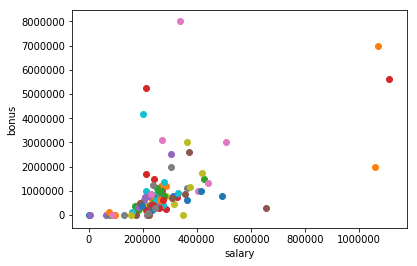

In [95]:
#Plotting Bonus vs Salary, Checking for the outliers

features = ["salary", "bonus"]

data = featureFormat(data_dict, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")


In [96]:
# Bonus Outliers

from pprint import pprint
bonus_outliers = []
for key in my_dataset:
    val = my_dataset[key]['bonus']
    if val == 'NaN':
        continue
    bonus_outliers.append((key,int(val)))

pprint(sorted(bonus_outliers,key=lambda x:x[1],reverse=True)[:2])

[('LAVORATO JOHN J', 8000000), ('LAY KENNETH L', 7000000)]


In [97]:
# Salary Outliers

salary_outliers = []
for key in my_dataset:
    val = my_dataset[key]['salary']
    if val == 'NaN':
        continue
    salary_outliers.append((key,int(val)))

pprint(sorted(salary_outliers,key=lambda x:x[1],reverse=True)[:2])

[('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321)]


609.0


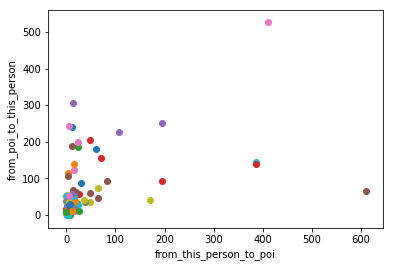

In [99]:
#Plotting from person to POI vs. from POI to person, Checking for the outliers
import matplotlib.pyplot

features = ["from_this_person_to_poi", "from_poi_to_this_person"]
data = featureFormat(my_dataset, features)


### your code below
print data.max()
for point in data:
    from_this_person_to_poi = point[0]
    from_poi_to_this_person = point[1]
    matplotlib.pyplot.scatter( from_this_person_to_poi, from_poi_to_this_person )

matplotlib.pyplot.xlabel("from_this_person_to_poi")
matplotlib.pyplot.ylabel("from_poi_to_this_person")
matplotlib.pyplot.show()

In [100]:
#To POI outliers

to_poi_outliers = []
for key in my_dataset:
    val = my_dataset[key]['from_this_person_to_poi']
    if val == 'NaN':
        continue
    to_poi_outliers.append((key,int(val)))

pprint(sorted(to_poi_outliers,key=lambda x:x[1],reverse=True)[:2])

[('DELAINEY DAVID W', 609), ('LAVORATO JOHN J', 411)]


In [101]:
#From POI to Outliers

from_poi_outliers = []
for key in my_dataset:
    val = my_dataset[key]['from_poi_to_this_person']
    if val == 'NaN':
        continue
    from_poi_outliers.append((key,int(val)))

pprint(sorted(from_poi_outliers,key=lambda x:x[1],reverse=True)[:2])

[('LAVORATO JOHN J', 528), ('DIETRICH JANET R', 305)]


In [109]:
def create_ratio(data_dict, ratio_name, numerator, denominator):
    '''Calcultes the ratio between a given numerator and denominator
    Names the ratio "ratio_name"
    Returns the the updated dictionary with the ratio values'''
    
    for person in data_dict:
        if data_dict[person][numerator] == 'NaN' or data_dict[person][denominator] == 'NaN':
                data_dict[person][ratio_name] = 'NaN'
        else:
            data_dict[person][ratio_name] = float(data_dict[person][numerator])/float(data_dict[person][denominator])
    return data_dict

In [110]:
data_dict = create_ratio(data_dict, 'from_poi_ratio', 'from_poi_to_this_person', 'to_messages' )
data_dict = create_ratio(data_dict, 'to_poi_ratio', 'from_this_person_to_poi', 'from_messages' )

In [111]:
features_list.append('from_poi_ratio')
features_list.append('to_poi_ratio')

In [113]:
#Feature Selection - Round 1

from time import time
features_list = ["poi", "salary", "bonus", "from_poi_ratio", "to_poi_ratio",
                 'deferral_payments', 'total_payments', 'loan_advances', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options',
                 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees']
data = featureFormat(my_dataset, features_list)

### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)

### split data into training and testing datasets
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.1, random_state=42)

t0 = time()

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print "Accuracy:", clf.score(features_test, labels_test)

print "Decision tree algorithm time:", round(time()-t0, 3), "s"

# Find the top feature in the decision tree and its relative importance

importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(16):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])

Accuracy: 0.6666666666666666
Decision tree algorithm time: 0.002 s
Feature Ranking: 
1 feature salary (0.272487165391)
2 feature bonus (0.158290984378)
3 feature from_poi_ratio (0.14622972935)
4 feature to_poi_ratio (0.128198757764)
5 feature deferral_payments (0.118337314859)
6 feature total_payments (0.0879795396419)
7 feature loan_advances (0.0534161490683)
8 feature restricted_stock_deferred (0.0350603595475)
9 feature deferred_income (0.0)
10 feature total_stock_value (0.0)
11 feature expenses (0.0)
12 feature exercised_stock_options (0.0)
13 feature long_term_incentive (0.0)
14 feature shared_receipt_with_poi (0.0)
15 feature restricted_stock (0.0)
16 feature director_fees (0.0)


In [117]:
#Feature Selection - Round 2
# Kept only the top 10 from the list above and removed the new  features

from time import time
features_list = ["poi", 'salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options']
data = featureFormat(my_dataset, features_list)

### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)

### split data into training and testing datasets
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.1, random_state=42)

t0 = time()

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print "Accuracy:", clf.score(features_test, labels_test)

print "Decision tree algorithm time:", round(time()-t0, 3), "s"

# Find the top feature in the decision tree and its relative importance

importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(10):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])

Accuracy: 0.8666666666666667
Decision tree algorithm time: 0.003 s
Feature Ranking: 
1 feature salary (0.211791217562)
2 feature deferral_payments (0.206033717835)
3 feature total_payments (0.204354676653)
4 feature loan_advances (0.18913356647)
5 feature bonus (0.13830656187)
6 feature restricted_stock_deferred (0.0503802596091)
7 feature deferred_income (0.0)
8 feature total_stock_value (0.0)
9 feature expenses (0.0)
10 feature exercised_stock_options (0.0)


In [118]:
#Feature Selection - Round 3
# Kept only the top 5 from the list above

from time import time
features_list = ["poi", 'salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus']
data = featureFormat(my_dataset, features_list)

### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)

### split data into training and testing datasets
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.1, random_state=42)

t0 = time()

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print "Accuracy:", clf.score(features_test, labels_test)

print "Decision tree algorithm time:", round(time()-t0, 3), "s"

# Find the top feature in the decision tree and its relative importance

importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(5):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])

Accuracy: 0.7692307692307693
Decision tree algorithm time: 0.003 s
Feature Ranking: 
1 feature salary (0.410860616692)
2 feature deferral_payments (0.238068106832)
3 feature total_payments (0.237973173078)
4 feature loan_advances (0.113098103398)
5 feature bonus (0.0)


Going to use the following features list because of the 87% accuracy from decision tree

features_list = ["poi", 'salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options']

In [126]:
#Right now NaNs are string, not actual NaNs -- change this
enron_df.replace(['NaN'], [None], inplace=True)

#Creates an alternate dataframe with NaNs replaced by 0s
no_nans = enron_df.fillna(0)

no_nans

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,2869717.0,3081055.0,0.0,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,...,304805.0,152.0,False,126027.0,126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
BADUM JAMES P,0.0,178980.0,0.0,0.0,0,257817.0,3486.0,0.0,0.0,0.0,...,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,182466.0,257817.0
BANNANTINE JAMES M,0.0,0.0,5104.0,0.0,james.bannantine@enron.com,4046157.0,56301.0,29.0,39.0,0.0,...,0.0,864523.0,False,1757552.0,560222.0,477.0,465.0,566.0,916197.0,5243487.0
BAXTER JOHN C,1200000.0,1295738.0,1386055.0,0.0,0,6680544.0,11200.0,0.0,0.0,0.0,...,1586055.0,2660303.0,False,3942714.0,0.0,267102.0,0.0,0.0,5634343.0,10623258.0
BAY FRANKLIN R,400000.0,260455.0,201641.0,0.0,frank.bay@enron.com,0.0,129142.0,0.0,0.0,0.0,...,0.0,69.0,False,145796.0,82782.0,239671.0,0.0,0.0,827696.0,63014.0
BAZELIDES PHILIP J,0.0,684694.0,0.0,0.0,0,1599641.0,0.0,0.0,0.0,0.0,...,93750.0,874.0,False,0.0,0.0,80818.0,0.0,0.0,860136.0,1599641.0
BECK SALLY W,700000.0,0.0,0.0,0.0,sally.beck@enron.com,0.0,37172.0,4343.0,144.0,386.0,...,0.0,566.0,False,126027.0,0.0,231330.0,2639.0,7315.0,969068.0,126027.0
BELDEN TIMOTHY N,5249999.0,2144013.0,2334434.0,0.0,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,108.0,...,0.0,210698.0,True,157569.0,0.0,213999.0,5521.0,7991.0,5501630.0,1110705.0
BELFER ROBERT,0.0,0.0,102500.0,102500.0,0,3285.0,3285.0,0.0,0.0,0.0,...,0.0,0.0,False,44093.0,44093.0,0.0,0.0,0.0,102500.0,0.0
BERBERIAN DAVID,0.0,0.0,0.0,0.0,david.berberian@enron.com,1624396.0,11892.0,0.0,0.0,0.0,...,0.0,0.0,False,869220.0,0.0,216582.0,0.0,0.0,228474.0,2493616.0


In [133]:
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [134]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

t0 = time()

clf = GaussianNB()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)

print "Naive Bayes Accuracy :", accuracy
print "training time:", round(time()-t0, 3), "s"
print 'Precision :', precision
print 'Recall :', recall


Naive Bayes Accuracy : 0.8461538461538461
training time: 0.003 s
Precision : 0.0
Recall : 0.0


In [ ]:
#SVM

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


clf = SVC(kernel = 'linear', C=1)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)


print "SVM Accuracy :", accuracy
print 'Precision :', precision
print 'Recall :', recall

In [129]:
#Decision Tree

from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)

print "Decision Tree Accuracy :", accuracy
print 'Precision :', precision
print 'Recall :', recall

Decision Tree Accuracy : 0.7692307692307693
Precision : 0.0
Recall : 0.0


In [32]:
from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
import numpy as np

clf = neighbors.KNeighborsClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)


print "KNN Accuracy :", accuracy
print 'Precision :', precision
print 'Recall :', recall

KNN Accuracy : 0.6896551724137931
Precision : 0.0
Recall : 0.0


C:\Users\Joseph\Anaconda3\envs\Python 2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [132]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)


print "Random Forest Accuracy :", accuracy
print 'Precision :', precision
print 'Recall :', recall

Random Forest Accuracy : 0.8461538461538461
Precision : 0.0
Recall : 0.0


C:\Users\Joseph\Anaconda3\envs\Python 2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [131]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)


print "AdaBoost Accuracy :", accuracy
print 'Precision :', precision
print 'Recall :', recall

AdaBoost Accuracy : 0.7692307692307693
Precision : 0.0
Recall : 0.0


https://github.com/tybyers/Udacity_IntroMachineLearning      
https://github.com/Meschreiber/Enron-ML-Classifier     
https://medium.com/@williamkoehrsen/machine-learning-with-python-on-the-enron-dataset-8d71015be26d